#**Project Name - Airbnb Bookings Analysis**

**Project Type** - EDA
<br>
**Contribution** - Individual (MANIKARAN RAYAPURAM)


#**Problem Statement**

**BUSINESS PROBLEM OVERVIEW**
<br>
How an airbnb will effectively match travelers with hosts, provide a seamless and secure booking experience, and grow the platform's user base while navigating regulatory and competitive challenges.<br>
How an airbnb will provide a user-friendly and secure booking process that enables travelers to easily find and book the right listing for their needs.

#### **Define Your Business Objective?** 

**Optimize the growth of Airbnb Booking**


#**General Guidelines : -**

1.Well-structured, formatted, and commented code is required.

2.Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

3.The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
4.Each and every logic should have proper comments.

You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

Chart visualization code<br>
Why did you pick the specific chart?
What is/are the insight(s) found from the chart?
Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
<br>
5.You have to create at least 20 logical & meaningful charts having important insights.
[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

#**Let's Begin !**

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive       
drive.mount('/content/drive')           # Mount drive to acces uploaded csv file .


dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/Airbnb NYC 2019.csv')


Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First 
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns 
dataset.shape

(48895, 16)

### Dataset Information

In [5]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate values

In [6]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


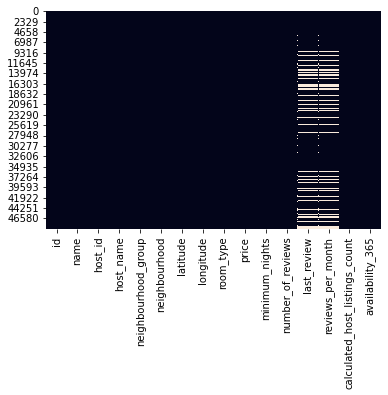

In [8]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given is a dataset from Airbnb booking, and we have to analysis the dataset and extract useful insights for business growth.<br>
The given dataset consists hosts who are providing the listings for rent , types of listings with their price per night to stay , number of reviews are given to the listings and avalability of the listings .
The above dataset has 48895 rows and 16 columns. There are few mising values and no duplicate values in the dataset.<br> Further I will impute those missing values based on the business logic .

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
# Dataset Describe
dataset.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


### Variables Description

**1.Id** : Unique id <br>
**2.Name** : Name of the listing <br>
**3.Host Id** : Unique host id <br>
**4.Host Name** : Name of the host <br>
**5.Neighbourhood Group** : Location<br>
**6.Neighbourhood** : Area <br>
**7.Latitude** : Latitude range <br>
**8.Longitude** : Longitude range <br>
**9.Room Type** : Type of listing or  Type of room <br>
**10.Price** : Price of listing per night <br>
**11.Minimum Nights** : Minimum nights to be paid for <br>
**12.Number Of Reviews** : Number of reviews <br>
**13.Last Review** : Content of the last review <br>
**14.Reviews Per Month** : Number of checks per month <br>
**15.Calculated Host Listing Count** : Total count <br>
**16.Avalability 365** : Avalability over the year <br>

**So what are the numerical and categorical variables?**

By basic inspection I figured out that a particular property name will have one particular host_name hosted by that same individual but a particular host_name can have multiple properties in a area.

So, host_name is a categorical variable here. Also neighbourhood_group,neighbourhood and room_type fall into this category.

While id, latitude, longitude,price,minimum_nights,number_of_reviews,last_review, reviews_per_month calculated_host_listings_count, availability_365 are numerical variables .

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


## ***3. Data Wrangling***

### Data wrangling code

---



In [12]:
# copy the original dataset for data wrangling .
df = dataset.copy()


**Handling Missing Values**

In [13]:
# check the null values 
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As, host_names and names are not that important in our analysis, so atleast we are good to fill those with some substitutes in both the columns!

In [14]:
#since both 'name' and 'host_name' has very less missing values as compared to 47,905 unique names and 11452 unique host names!
#we can fill these missing values in both with unknown & no_name respectively!

df['name'].fillna('unknown',inplace=True)
df['host_name'].fillna('no_name',inplace=True)

The column 'last_review' has many null values. And since it's not much required for our analysis as compared to number_of_reviews & reviews_per_month. We're good to drop this column.

In [15]:
df = df.drop(['last_review'],axis=1)


The reviews_per_month column containing null values and we can simple put 0 reviews by replacing NAN's
makes sense right?

In [16]:
df['reviews_per_month']=df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
# show some statistical parameters of variables
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


In the above the minimum price is 0 , It seems that is not good for business . So we must suggest that to the host to update the price of the listing .
Further process check the number of listing with price  0 .
If the number of listing are more then replace that price with median price other wise remove those rows from the dataset .

In [18]:
# Number of listings with price 0 .
df[df['price']==0].shape[0]

11

In [19]:
# Only 11 listings are present with price 0 . So remove that 11 rows doesn't effect the dataset .
df = df[df['price']>0]

**Handling the Outliers**

In the given dataset , the maximum value in the price column is 10,000 .
Here it seems to be an extreme value or an outlier as compared to remaining values in the price column  . Which not make sense other wise that the listing may be more luxury . So , to predict accurately we handle the extreme values or outliers .
> Remove those outliers or Replace those outliers with its nearset values ,
while handling the outliers the data must not be skewed .

In [20]:
# Removing Outliers using qunatile approach!
min_threshold,max_threshold = df.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

The minimum threshold and maximum threshold prices are seems to good .

In [21]:
df[df['price']<30].shape[0],df[df['price']>3000].shape[0]

(393, 45)

In [22]:
#subsetting only those rows having datapoints greater than minimum threshold range and lesser than maximum threshold  range respectively
df_air = df[(df.price>min_threshold) & (df.price<max_threshold)]
# Only 0.9% of the rows are removed after handling missing values and handling outliers . So , finally removing these rows doesn't effect for the entire data and business logic .
# Now the remaining dataset is suitable for further analysis .
df_air.shape

(48183, 15)

####**Experimenting on the data to fetch insights or patters as per business logic .**

In [23]:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

######**1.Let's check the expensive & cheapest listings with respect to prices !**

In [24]:
# The costliest :
df_air.nlargest(10,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Upper West Side,Lisa,Entire home/apt
48304,Next to Times Square/Javits/MSG! Amazing 1BR!,Manhattan,Hell's Kitchen,Rogelio,Entire home/apt
46533,Amazing Chelsea 4BR Loft!,Manhattan,Chelsea,Viberlyn,Entire home/apt
30824,Designer's Beautiful 2BR Apartment in NOLITA/SOHO,Manhattan,Nolita,Ilo And Richard,Entire home/apt
22992,"Modern Townhouse for Photo, Film & Daytime Ev...",Manhattan,Upper West Side,Lanie,Entire home/apt
41770,Recently Renovated & Furnished Apt- Room avail...,Manhattan,West Village,Sonia,Private room
22373,West Chelsea Studios - Penthouse 12,Manhattan,Chelsea,Jackie,Private room
3782,3 Bedroom Apartment,Manhattan,Kips Bay,Patrick,Entire home/apt
5839,Columbus Circle and Park Views,Manhattan,Upper West Side,Lisa,Entire home/apt
29665,Park Place Townhouse by (Hidden by Airbnb),Brooklyn,Park Slope,Sally,Entire home/apt


In [25]:
# The cheapest :
df_air.nsmallest(10,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
2887,Amazing Spacious Room,Brooklyn,Bedford-Stuyvesant,Lord Daniel,Private room
4096,Budge private room F,Brooklyn,Borough Park,Susan,Private room
6571,Sunny Room in Charming Bed-stuy Apartment,Brooklyn,Bedford-Stuyvesant,Laina,Private room
6615,"Super Clean, Quiet & Spacious Room",Queens,Woodhaven,Troy,Private room
7431,Cozy room right on BROADWAY - Washington Heights,Manhattan,Washington Heights,Nga,Private room
7864,Comfortable and Large Room,Brooklyn,Flatbush,Kay,Private room
12516,cute and cozy room in brooklyn,Brooklyn,Bedford-Stuyvesant,Ornella,Private room
12766,Lovely Lofted Artist's Room,Brooklyn,Bedford-Stuyvesant,Robyn,Private room
14475,"Spacious, modern room in Bedstuy",Brooklyn,Bedford-Stuyvesant,Will,Private room
15762,Private bedroom in Crown Heights!,Brooklyn,Crown Heights,Charlötte,Private room


######**2.Let's check for the neighbourhoods with listings having highest average price/day in each neighbourhood groups !**

In [26]:
df_ngrp= df_air.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
df_ngrp

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
220,Staten Island,Woodrow,700.000000
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
121,Manhattan,Tribeca,410.531429
...,...,...,...
199,Staten Island,New Dorp,57.000000
39,Bronx,Tremont,56.888889
36,Bronx,Soundview,55.285714
181,Staten Island,Bull's Head,51.800000


In [27]:
top_neigh_each= df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
121,Manhattan,Tribeca,410.531429
163,Queens,Neponsit,274.666667


######**3.Let's checkout the costliest and cheapest listings in each neighbourhood groups & their respective hosts !**

In [28]:
#costliest listings in each neighbourhood groups
costliest_df= df_air.loc[df_air.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]
costliest_df.sort_values(by='price',ascending=False)

,name,neighbourhood_group,host_name,price
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Lisa,2999
29665,Park Place Townhouse by (Hidden by Airbnb),Brooklyn,Sally,2626
42680,Majestic Mansion LifeStyle :),Queens,Shah,2600
24477,"""The luxury of Comfort""",Bronx,Kathy,2500
45572,Central Hall Colonial with Free Parking Bus EX...,Staten Island,Anastasios,1250


In [29]:
#cheapest listings in each neighbourhood groups
cheapest_df= df_air.loc[df_air.groupby('neighbourhood_group')['price'].idxmin()][['neighbourhood_group','name','host_name','price']]
cheapest_df.sort_values(by='price',ascending=True)

,neighbourhood_group,name,host_name,price
2887,Brooklyn,Amazing Spacious Room,Lord Daniel,31
7431,Manhattan,Cozy room right on BROADWAY - Washington Heights,Nga,31
6615,Queens,"Super Clean, Quiet & Spacious Room",Troy,31
30312,Staten Island,Nice room near SI Ferry \n15 minutes by car.,Sara I,31
3889,Bronx,"A Simple, Calm Space",Août,32


######**4.Let's check the average price of the type of listing with respect to the neighbourhood group !**

In [30]:
df_air.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index().sort_values(by='price',ascending=False)

,neighbourhood_group,room_type,price
6,Manhattan,Entire home/apt,237.113847
3,Brooklyn,Entire home/apt,173.262921
9,Queens,Entire home/apt,147.483006
12,Staten Island,Entire home/apt,146.268571
0,Bronx,Entire home/apt,127.769841
7,Manhattan,Private room,114.158154
14,Staten Island,Shared room,98.750000
8,Manhattan,Shared room,91.557484
11,Queens,Shared room,91.300000
2,Bronx,Shared room,84.342857


######**5.Let's check the top  reviews per month on listings !**

In [31]:
#top 10 most reviews per month listings !
top10_reviewed_listings= df_air.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','room_type','neighbourhood_group']]

,name,reviews_per_month,room_type,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58,Private room,Manhattan
42076,Great Room in the heart of Times Square!,27,Private room,Manhattan
38870,Lou's Palace-So much for so little,20,Private room,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19,Private room,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17,Private room,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16,Private room,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16,Private room,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16,Private room,Queens
36238,“For Heaven Cakes”,15,Entire home/apt,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15,Private room,Queens


######**6.Let's check the top 10 reviewed hosts on the basis of reviews/month !.**

In [32]:
#there are cases where same hosts are hosting multiple properties in same/different areas.
reviews_df=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean() 
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df

,host_name,reviews_per_month
5,Row NYC,42.500000
3,Louann,20.000000
4,Nalicia,17.333333
1,Danielle,16.000000
0,Brent,15.000000
2,Lakshmee,15.000000


######**7.Lets check the hosts with most no of listings (on the basis of host listings count) !**

In [33]:
host_with_most_listings= df_air.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

,host_name,neighbourhood_group,calculated_host_listings_count
13084,Sonder (NYC),Manhattan,106929
1816,Blueground,Manhattan,53360
7211,Kara,Manhattan,14669
6483,Jeremy & Laura,Manhattan,9216
13083,Sonder,Manhattan,9216
2877,Corporate Housing,Manhattan,8281
7413,Kazuya,Queens,7725
7478,Ken,Manhattan,7500
11295,Pranjal,Manhattan,4225
9762,Mike,Manhattan,2823


In [34]:
# Also check for hosts with most listings in each neighbourhood group !
hosts_df=host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
print(hosts_df)
host_with_most_listings[hosts_df].sort_values(by='calculated_host_listings_count',ascending=False)

0        False
1        False
2        False
3        False
4        False
         ...  
15191    False
15192    False
15193    False
15194    False
15195    False
Name: calculated_host_listings_count, Length: 15196, dtype: bool


,host_name,neighbourhood_group,calculated_host_listings_count
13084,Sonder (NYC),Manhattan,106929
7413,Kazuya,Queens,7725
14293,Vida,Brooklyn,2705
14296,Vie,Bronx,169
679,Amarjit S,Staten Island,64


######**8.Let's check the maximum of number of reviews with respect to the  neighbourhood group and rooom type !**

In [35]:
df_air.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews',ascending=False)

,neighbourhood_group,room_type,number_of_reviews
10,Queens,Private room,629
7,Manhattan,Private room,607
3,Brooklyn,Entire home/apt,488
4,Brooklyn,Private room,480
11,Queens,Shared room,454
6,Manhattan,Entire home/apt,447
9,Queens,Entire home/apt,441
13,Staten Island,Private room,333
1,Bronx,Private room,321
0,Bronx,Entire home/apt,271


######**9.Let's check the number of listings in neighbourhood group!**

In [36]:
df_air['neighbourhood_group'].value_counts()

Manhattan        21548
Brooklyn         19748
Queens            5507
Bronx             1024
Staten Island      356
Name: neighbourhood_group, dtype: int64

######**10.Let's check the number of listings on the basis of room_type !**

In [37]:
df_air['room_type'].value_counts()

Entire home/apt    25339
Private room       21935
Shared room          909
Name: room_type, dtype: int64

### What all manipulations have you done and insights you found?

**1.Checking for missing values:**

From the given dataset of airbnb booking , it have 48895 rows and 16 columns .
There are few missing values in the columns name and host name (less than 25 missing values).I imputed those missing values of name as 'unknown' ans host name as 'no name' , that the imputaion doesn't effect the dataset and business logic also .
The other two columns last review and reviews per month column have 10052 missing values each , the 25% of missing values are not good for analysis or any statistical operations . So, by dropping last review column doesn't effect the dataset and also the missing values in the column are replace with value 0 , it makes sence right as per business logic .

**2.Checking for outliers:**

From the given dataset of airbnb , In the price per night column few values are 0 , it seems to be an outlier because of that the customers will stay without paying anything to the host . It is not good for the business for the sake of provider or host will see the losses in the business .
So, I dropped the rows which having price as 0 , and also in the same column prive few values are ranges between 4000-10000 . It also seems to be an outliers other than those listings are more luxury and providing best features .
So, I dropped the rows where the price values are ranges between 4000 to 10000 .

**3.The expensive & cheapest listings with respect to prices:**

The top 5 costliest listings belongs to **Manhattan** itself(being the most costliest place of living in NYC)<br>
The cheapest listings mostly comes from **Brooklyn, Queens** and all are private rooms.

**4.The neighbourhoods with listings having highest average price/day in each neighbourhood groups:**

Among the top neighbourhoods in each neighbourhood groups, top 2 of them namely: **Fort Wadsworth & Sea Gate**, origins from **Staten Island & Brooklyn**.

**Riverdale** from **Bronx** and **Tribeca** from **Manhattan**. **Neponsit** from **Queens**.

**5.The costliest and cheapest listings in each neighbourhood groups & their respective hosts:**

The top 2 costliest listings: **LUXURIOUS 5 bedroom, 4.5 bath home & Park Place Townhouse** were from **Manhattan and Brooklyn**, hosted by **Lisa** and **Sally** respectively.<br>
Almost all the **neighbourhood groups** with the **lowest** **price** falls in the same price range for the **cheapest** listings.

**6.The top reviews per month on listings:**

The listings with highest number of reviews, the highest being: **Enjoy great views of the City in our Deluxe Room!** with 58 reviews/month followed by **Great Room in the heart of Times Square!** with a total of 27 reviews/month. Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford.



**7.The hosts with most no of listings (on the basis of host listings count):**

**Sonder(NYC)** leads the most expensive neighbourhood group in NYC with around 106929 properties listed followed by **Blueground** and **Kara**.Also, all 3 of them has their listings on **Manhattan**.

**8.The top 3 reviewed hosts on the basis of reviews/month:**

**Row NYC** gets maximum average reviews per month that is **42** , followed by **Louann** gets **20** revies/month and **Nalicia** gets **17** reviews per month .

**9.Maximum number of reviews** are given to the **private rooms** .

**10.Maximum number of rooms** are located in **manhattan** and **maximum room types** are **entire home/apt** .

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships***

#### Chart - 1 - Column wise Histogram & Box Plot Univariate Analysis

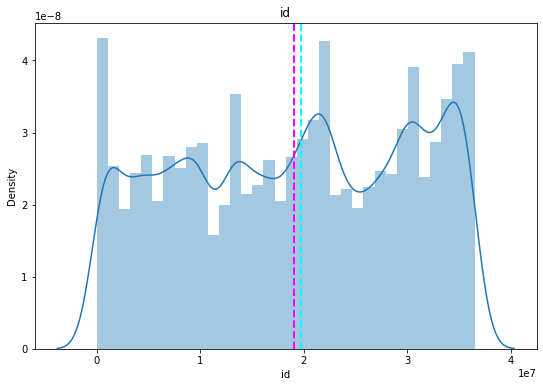

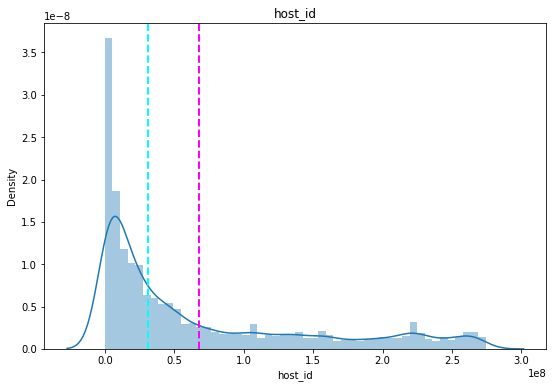

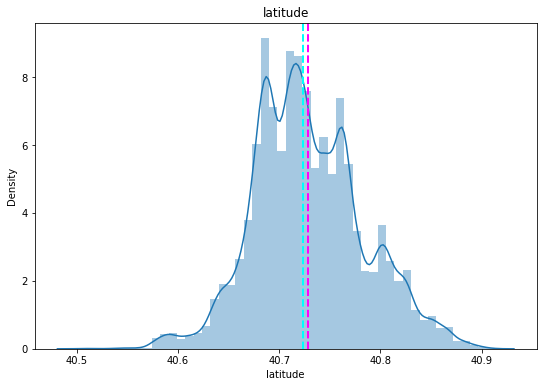

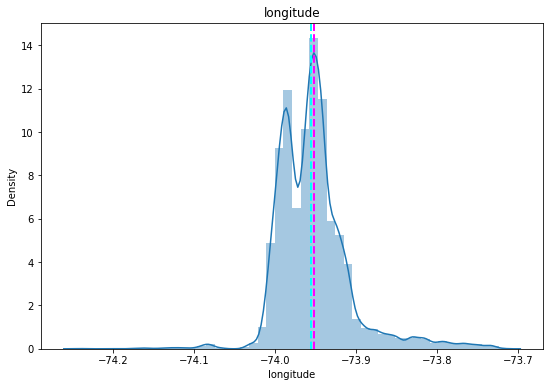

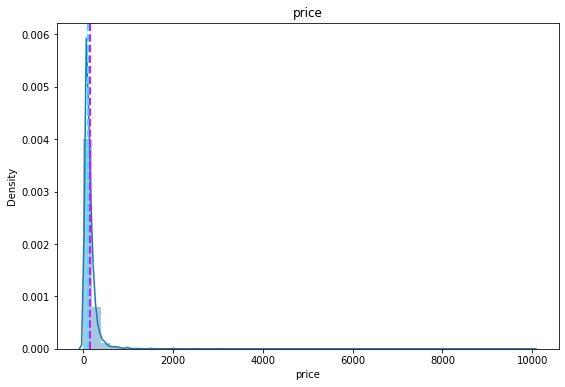

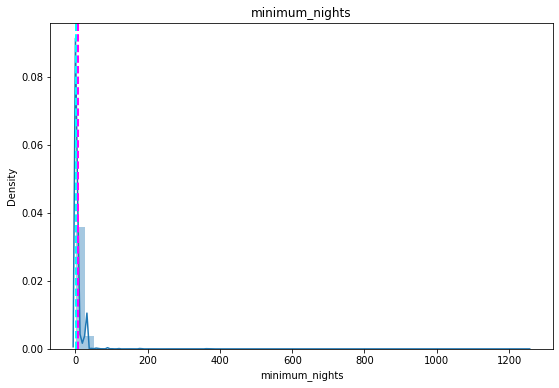

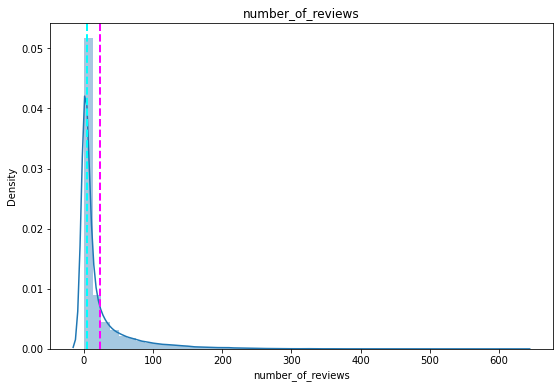

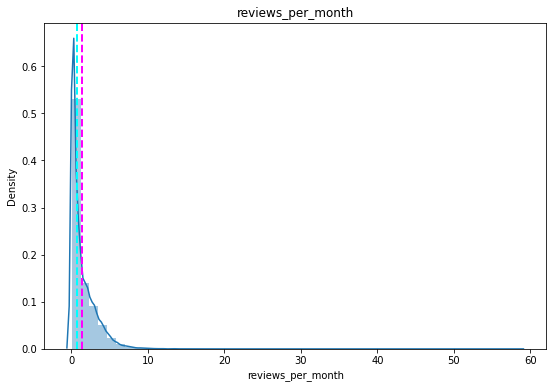

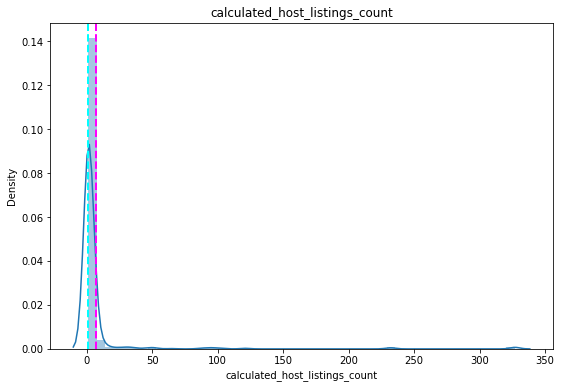

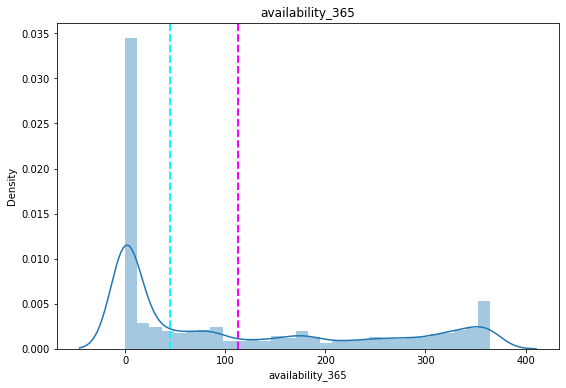

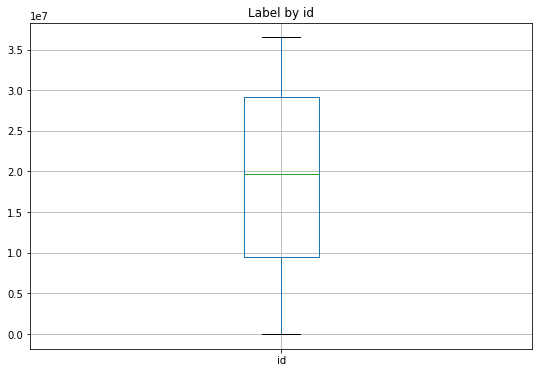

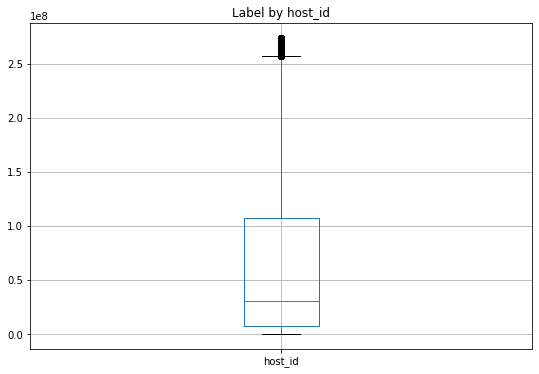

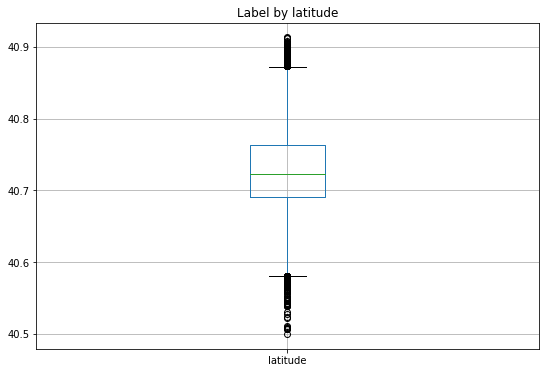

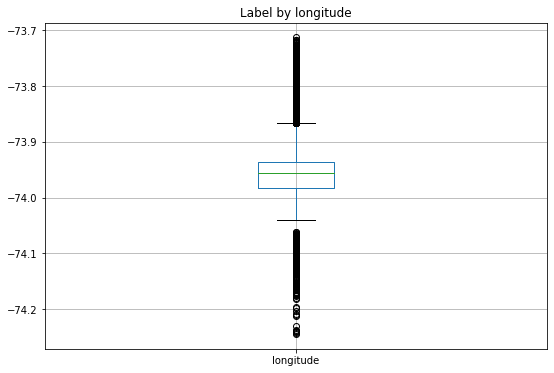

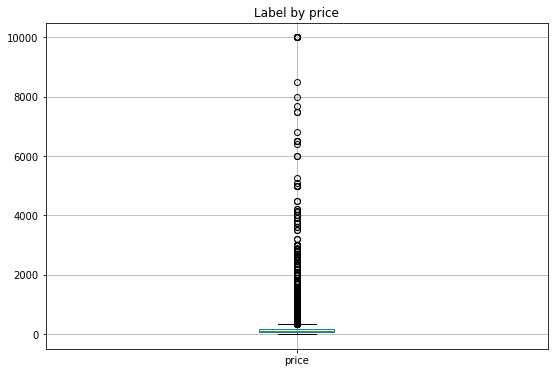

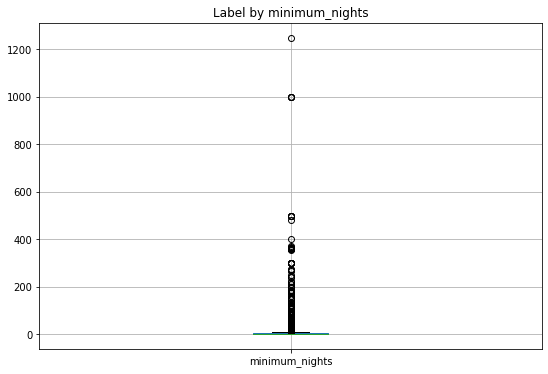

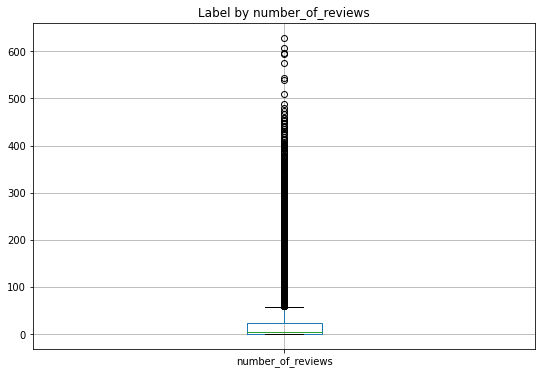

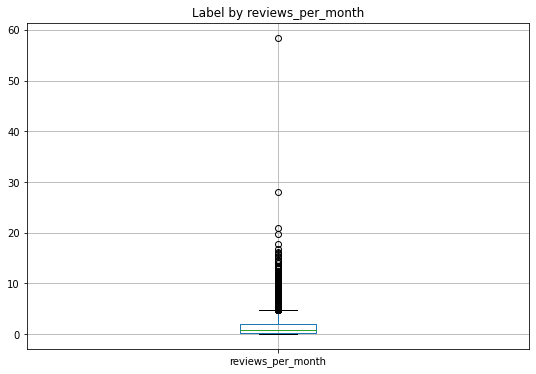

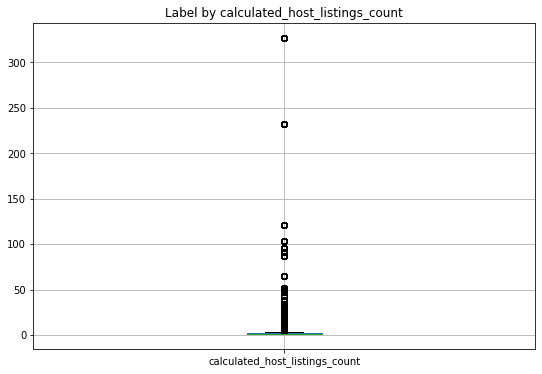

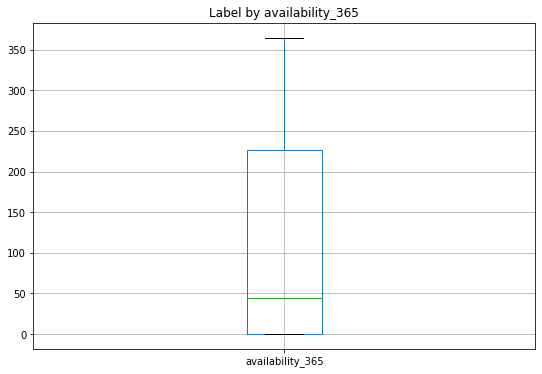

In [38]:
# Chart - 9 visualization code
# Visualizing code of hist plot for each columns to know the data distibution
for col in dataset.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  sns.distplot(dataset[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

# Visualizing code of box plot for each columns to know the data distibution
for col in dataset.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot( col, ax = ax)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()


##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

Almost all columns are right skewed or positively skewed and mean is greater than median for numerical columns. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Just a histogram and box plot cannot define business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart - 2 - Correlation Heatmap

In [39]:
# Correlation Heatmap visualization code
corr = dataset.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.00,0.59,-0.00,0.09,0.01,-0.01,-0.32,0.29,0.13,0.09
host_id,0.59,1.00,0.02,0.13,0.02,-0.02,-0.14,0.30,0.15,0.20
latitude,-0.00,0.02,1.00,0.08,0.03,0.02,-0.02,-0.01,0.02,-0.01
longitude,0.09,0.13,0.08,1.00,-0.15,-0.06,0.06,0.15,-0.11,0.08
price,0.01,0.02,0.03,-0.15,1.00,0.04,-0.05,-0.03,0.06,0.08
minimum_nights,-0.01,-0.02,0.02,-0.06,0.04,1.00,-0.08,-0.12,0.13,0.14
number_of_reviews,-0.32,-0.14,-0.02,0.06,-0.05,-0.08,1.00,0.55,-0.07,0.17
reviews_per_month,0.29,0.30,-0.01,0.15,-0.03,-0.12,0.55,1.00,-0.01,0.19
calculated_host_listings_count,0.13,0.15,0.02,-0.11,0.06,0.13,-0.07,-0.01,1.00,0.23
availability_365,0.09,0.20,-0.01,0.08,0.08,0.14,0.17,0.19,0.23,1.00


##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap, we can see price & minimum nights , price & calculated host listing count and price & avalability days have positive low correlation .Number of reviews and reviews per month have maximum positive correlation .
Rest all correlation can be depicted from the above chart.



#### Chart - 3 - Pie Chart on Categorical Variable i.e., Neighbourhood_group (Univariate)

In [40]:
# know the count of each neighbouhood group .
df_air['neighbourhood_group'].value_counts()

Manhattan        21548
Brooklyn         19748
Queens            5507
Bronx             1024
Staten Island      356
Name: neighbourhood_group, dtype: int64

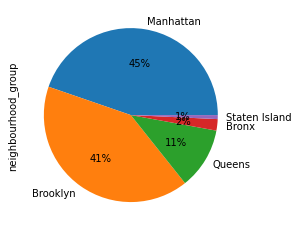

In [41]:
df_air['neighbourhood_group'].value_counts().plot(kind='pie', autopct='%1.0f%%')

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, the **maximum number of listings** are located in **manhattan (21548)** and **brooklyn (19748)** .**Minimum number of listings** are from **staten island (356)** .



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact :**<br>
It seems to that the airbnb managing the more number of listings nearly 48895 . So, it is providing the it's services to the hosts (space for rent) as well as customers(pay for space) .


#### Chart - 4 - Bar Chart on Categorical Variable i.e., host_name (Univariate)

In [42]:
# find the frequency of the host and select top 10 hosts based on the count .
top_10_hosts=df_air['host_name'].value_counts()[:10]
print(top_10_hosts)
print(" ")
print(df_air['host_name'].value_counts().reset_index().sort_values(by='host_name'))

Michael         416
David           398
Sonder (NYC)    327
John            291
Alex            273
Blueground      232
Sarah           225
Daniel          224
Jessica         202
Maria           198
Name: host_name, dtype: int64
 
             index  host_name
5675         Jayme          1
7563        Shenaz          1
7564        Taeler          1
7565        Spanky          1
7566        Bishal          1
...            ...        ...
4             Alex        273
3             John        291
2     Sonder (NYC)        327
1            David        398
0          Michael        416

[11352 rows x 2 columns]


Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

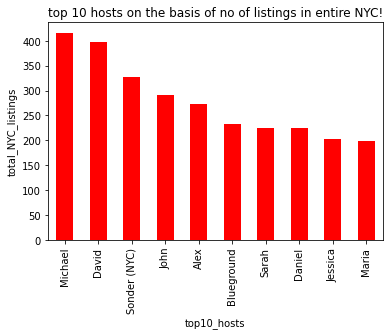

In [43]:
top_10_hosts.plot(kind='bar',color='r')
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC!')

##### 1. Why did you pick the specific chart?

Bar charts allow for easy comparison of frequencies or counts for different categories, making it easy to see which categories are the most common or have the highest values. They also allow for easy visual representation of categorical data and are a common choice for summarizing categorical data.

##### 2. What is/are the insight(s) found from the chart?

The maximum number of listings i.e 416, 398 and 327 are belongs to Michael,David and Sondr(NYC) respectively .


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The airbnb must have good communication with the hosts who have maximum listings(mostly focus on top 10 hosts having maximum listings) . The host who is providing the more number of listings will gain more profits  then the growth of the airbnb also increases .


#### Chart - 5 - Bar Chart on Categorical Variable i.e., Neighbourhood (Univariate)

Williamsburg          3909
Bedford-Stuyvesant    3636
Harlem                2636
Bushwick              2399
Upper West Side       1959
Hell's Kitchen        1954
East Village          1848
Upper East Side       1792
Midtown               1543
Crown Heights         1531
Name: neighbourhood, dtype: int64
 


Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

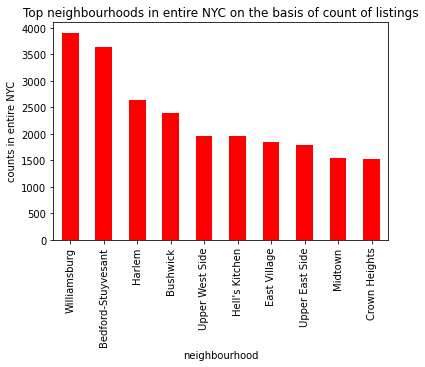

In [44]:
top_10_neighbours= df_air['neighbourhood'].value_counts()[:10] #checking top 10 neighbourhoods on the basis of no of listings in entire NYC!
print(top_10_neighbours)
print(" ")
top_10_neighbours.plot(kind='bar',color='r')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

##### 1. Why did you pick the specific chart?

Bar charts allow for easy comparison of frequencies or counts for different categories, making it easy to see which categories are the most common or have the highest values. They also allow for easy visual representation of categorical data and are a common choice for summarizing categorical data.

##### 2. What is/are the insight(s) found from the chart?

From the above chart , we can see the maximum number of listings 3909 , 3636 nad 3626 are located in the areas williamsburg , bedford-stuyvesant and Harlem  respectively . 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Airbnb should have good communication with the hosts who are providing the listings in the areas or maximum listings in the top 10 areas like williamsburg , bedford-stuyvesant , Harlem, bushwick , upper west side etc .


#### Chart - 6 - Pie Chart on Categorical Variable i.e., Room type (Univariate)

In [45]:
df_air['room_type'].value_counts()

Entire home/apt    25339
Private room       21935
Shared room          909
Name: room_type, dtype: int64

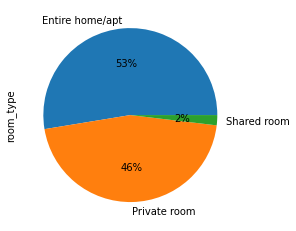

In [46]:
df_air['room_type'].value_counts().plot(kind='pie', autopct='%1.0f%%')

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, the **maximum number of listings** are as a type **Entire home/apt** (25339) and the **minimum number of listings** are as a type **shared rooms**(909).



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Negative Impact :**<br>
Number of shared rooms under airbnb are very less as compared to other type of listings.


#### Chart - 7 - Point Plot on price with respect to Neighbourhood Group   (Bivariate  Numerical-Categorical)

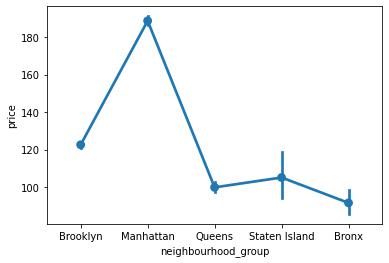

In [47]:
#looking for the average price each neighbourhood groups holds 
sns.pointplot(x = 'neighbourhood_group', y='price', data=df_air)

##### 1. Why did you pick the specific chart?

Point plots are commonly used to visualize the relationship between a numerical variable and a categorical variable. The plot displays the mean or median of the numerical variable for each category of the categorical variable, and shows the distribution of the data through error bars or a box plot. This type of plot allows you to easily see the central tendency and spread of the data for each group, and identify any outliers or patterns in the relationship between the variables.

##### 2. What is/are the insight(s) found from the chart?

From the above chart , we can see <br>
That **Manhattan** has the **highest(the costliest) average of price** ranging to ~150dollars/day followed by **Brooklyn** <br>
 **Queens** and **Staten Island** have same average price/day, while **Bronx** comes out to be the **cheapest** neighbourhood group in NYC.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Choosing the costliast or cheapest rooms are depends upon the customer .
But here the airbnb will guide those customer based on their budget(money) .
For this the airbnb would collect the budget data from the customer , before they want to booking the rooms . <br>
Then the airbnb will displays the number of listings which are under budget of the customers . There is a possibility this feature will attract the more number of the customers .


#### Chart - 8 - Count Plot on Room Type with respect to Neighbourhood Group   (Bivariate  Categorical-Categorical)

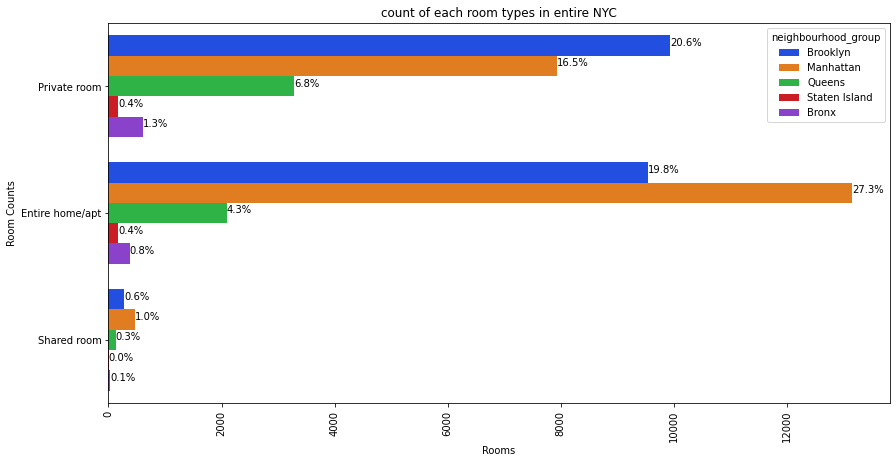

In [48]:
plt.rcParams['figure.figsize'] = (14, 7)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df_air,palette='bright')

total = len(df_air['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

##### 1. Why did you pick the specific chart?

 when comparing categorical variables to one another. Count plots are used to display the frequency or count of the occurrences of each category in a categorical variable. <br>
 Count plots provide a simple way to visualize the distribution of a categorical variable, making it easy to compare the number of occurrences of each category. They are also useful for identifying the dominant categories and identifying patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

From the above chart , we can see <br>
* Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%. <br>
* Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.<br>
* Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.<br>
* We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.<br>


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact :**<br>
More number of listing (entire home/apt ,private rooms ,shared rooms) are located in **manhattan** and **brookly** . If the customers want to stay in these locations the airbnb can assist those customers easily . <br>
**Negative Impact :**<br>
There are very less number of shared rooms in staten island under airbnb .<br>
This may leads to decrement of the usage of the airbnb during seasonal days .
Because of , during the seasonal days most of the travelers or visitors want to visit island to enjoy the beauty of the nature . This type of travellers will choose shared rooms to stay on the basis of cheap and best .


* So , the **airbnb** must **increase** the number of listings of type as **shared rooms** in the **staten island** during the **seasonal days** .


#### Chart - 9 - Bar Chart on room type vs ninimum nights (Bivariate Categorical - Numerical)

Text(0, 0.5, 'Room types')

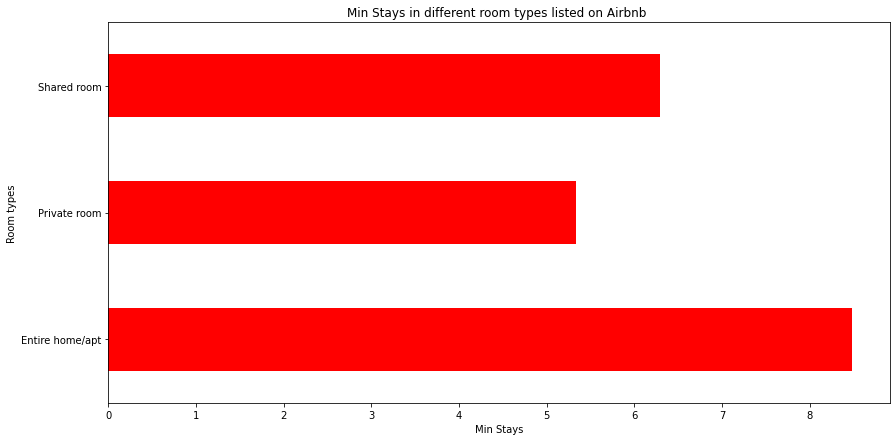

In [49]:
# min_night= df_air_pnw['room_type']
df_air.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='r')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Min Stays')
plt.ylabel('Room types')

# ax = sns.swarmplot(x="room_type", y="minimum_nights", data=df_air)

##### 1. Why did you pick the specific chart?

Bar charts allow for easy comparison of frequencies or counts for different categories, making it easy to see which categories are the most common or have the highest values. They also allow for easy visual representation of categorical data and are a common choice for summarizing categorical data.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see , the average minimimum nights for  entire home/apt , private rooms and shared rooms are nearly 8 days ,5 days and 6 days respectiviely .


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact :** <br>
It is good to have the average minimum nights for entire home/apt and private rooms is greater than 5 days . This types of rooms are mostly choosen by the customers who will comes with their family to enjoy the vacations . This type of customers nearly stay more than or equal to 5 days . So , the average minimum nights for entire home/apt and private rooms makes sense right !<br>
**Negative Impact:**<br>
Here , the average minimum nights for the shared rooms are nearly 6 days , it seems to be not good for the business . Because of shared rooms are mostly chosen by the cusomers who will stay nearly 1-4 days or any one want to stay less than 5 days . By this the airbnb will loose their customer , which means the customers will not booking the shared room which having minimum nights greater than 3-4 days . So , the avaerage minimum nights for the shared rooms not makes sense right !
* So , the airbnb will communicate with the host who fixed that the minimun nights for the shared rooms is greater than 3 days will change the status of minimum nights to less than or equal to 3 days .


#### Chart - 10 - Scatter plot on longitude vs latitude hue of neighbourhood ngroup (Bivariate Numerical - Numerical)

Text(0.5, 1.0, 'Location Co-ordinates')

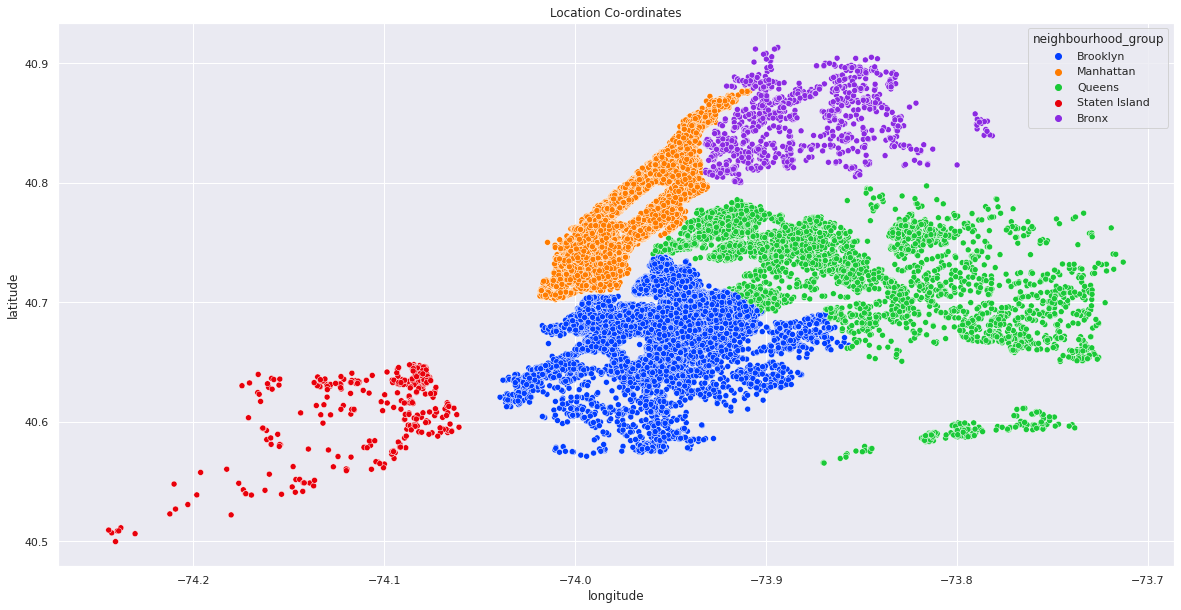

In [50]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (20, 10)})
ax= sns.scatterplot(data=df_air, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

##### 1. Why did you pick the specific chart?

A scatter plot is a good choice when we want to visualize the relationship between two numerical variables. It allows us to see the distribution of one variable against the other and observe how the points are dispersed. This makes it a useful tool for exploring the relationship between two variables, detecting patterns and trends, and identifying outliers. Additionally, a scatter plot can help you understand the strength and direction of the relationship between the two variables and if there is a linear or non-linear association.





##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see , <br>
The most number of rooms are located in the range of (-74.0,40.6) t0 (-73.9 ,40.8) .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact :** <br>
The customers will find more number of listings in **manhattan **, **brooklyn** and **queens** .


#### Chart - 11 - Cat Plot on price vs room type with hue neighbouhood group   (Bivariate  Numerical-Categorical)

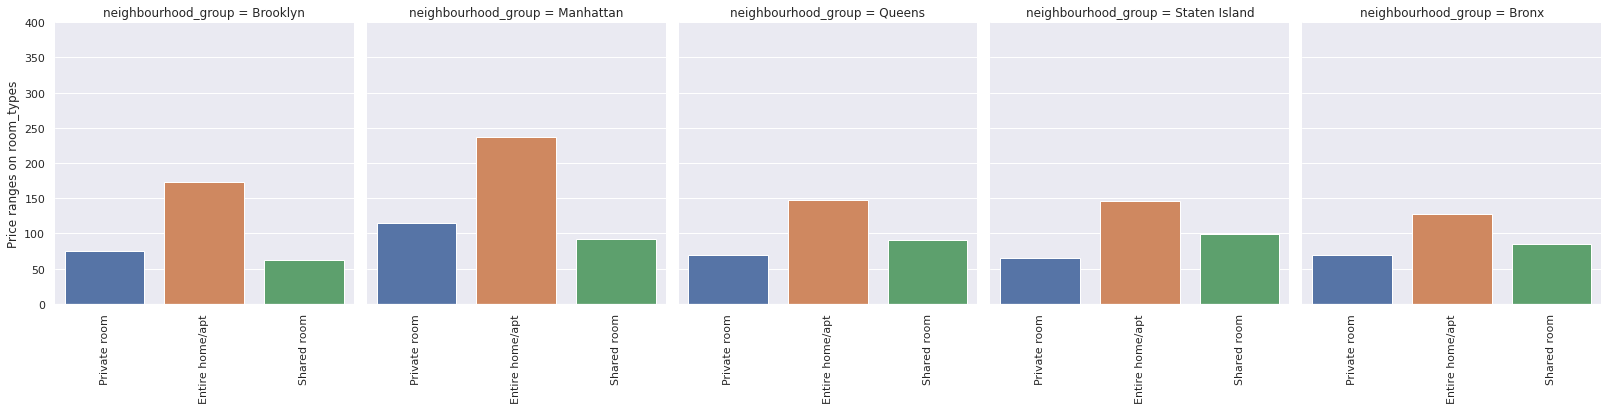

In [51]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df_air, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True)) 

##### 1. Why did you pick the specific chart?

When we have two categorical variables and one numerical variable, you can use a categorical plot with hue to visualize the relationship between them. In this type of cat plot, each data point is represented as a distinct mark, and the hue encoding is used to represent a third categorical variable. This allows you to see the relationship between the two original categorical variables and the numerical variable, while also taking into account the values of the third categorical variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart , we can see <br>
* The price range in **manhattan** and **brooklyn** based upon room type is entire home/apt > private rooms > shared rooms .
* The price range in **Queens** , **staten island** and **bronx** based upon room type is entire home/apt > shared rooms > private rooms .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Negative Impact :**<br>
The number of shared rooms are vey less as compared to remaining rooms in **Queens** , **staten island** and **bronx** . In these three locations price of the shared rooms is greater than private rooms , by this more number of the customer will choose the private rooms (which have more privacy than shared rooms) . Due this the booking of the shared rooms will decrease in these locations . This may leads to left of shared rooms as empty and this will decrease the profits of the hosts .<br>
So , communicate with the hosts who are hosting the rooms in the locations **Queens** , **staten island** and **bronx** to set the price of shared rooms less than the private rooms or price of private rooms greater than the shared rooms . Other wise leave it if those prices of rooms are based on luxury or area of space .




#### Chart - 12 - Strip Plot on monthly reviews varies with room types in each neighbourhood groups   (Bivariate  Numerical-Categorical)

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

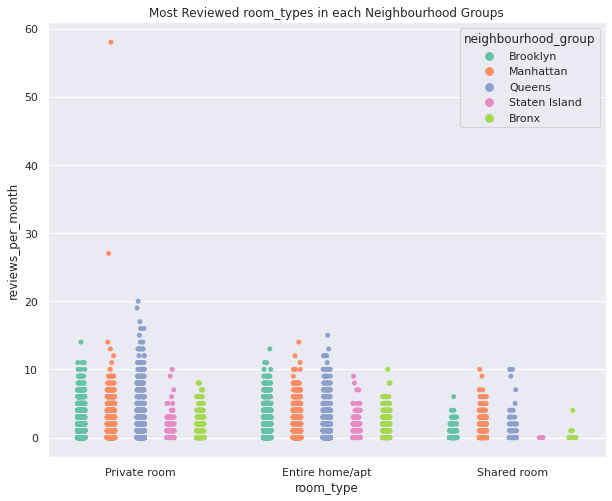

In [52]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=df_air,palette='Set2')
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

##### 1. Why did you pick the specific chart?

A strip plot is a good choice when we want to visualize the relationship between a numerical variable and a categorical variable when the categorical variable has multiple levels. By coloring the points according to another categorical variable, the strip plot allows us to see the distribution of the numerical variable for each level of the first categorical variable, as well as how the distribution varies between the different levels of the second categorical variable. This makes it a useful tool for exploring the relationships between multiple variables and detecting patterns and trends in your data.

##### 2. What is/are the insight(s) found from the chart?

From the above chart , we can see <br>
* That **Private room** recieved the **most** no of reviews/month where **Manhattan** had the highest reviews received for Private rooms with more than **50** reviews/month, followed by Manhattan in the chase.
* **Manhattan** & **Queen**s got the most no of reviews for Entire home/apt room type.
* There were less reviews recieved from **shared rooms** as compared to other room types and it was from **Staten Island** followed by **Bronx**.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Negative Impact :**<br>
The shared rooms under airbnb are very less and the reviews recieved for shared rooms in the locations staten island and bronx are very less.This seems to that the shared rooms in staten island and bronx are not maintained well .<br>
If any one dislike the quality of the particular room , he will not stay in that room for future requirements and also that the customer  will say to other about the quality of the room . Due to this the airbnb might loose thier customers .   <br>
 * So , the airbnb will communicate with the hosts in staten island and bronx to guide them to provide the best quality of rooms to impress the customers .

## ***5. Solution to Business Objective***

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

**Solution to Develop the growth of airbnb booking**
*	Regularly communicate with the hosts for good partnership .
* Make the more number of connections with with hosts to increase number of listings (increase connectivity) .
* Every time guide the hosts to provide the listings with better quality and more features .
* It is good to set the minimum nights to stay are less than 5 days .
* Help the customers more easily find the right accommodations for their needs.
*	Ask the feedback from customers.
*	Periodically throw offers to retain customers.
*	Look at the customers facing problem while booking.
*	Define a roadmap for new customers.
*	Stay competitive.




#**Conclusion**

* There are few listings with price per night is 0 and more number of missing values in last review column and review per month column , and can be omitted .
* The costliast place to stay or live is manhattan .
* The cheapest place to stay or live is bronx .
* More number of listings are located in manhattan and brooklyn .
* Entire home/apt have more price than private room and shared room in each neighbouhood group .
* The private rooms are better than other rooms .
* Very less number of shared rooms in staten island and bronx .
* The average minimum nights to stay ranges between 4-8 days .
* Sonder (NYC) , Blueground and Kara are the top 3 hosts providing more number of listing from manhattan .
* The host Row NYC gets maximum average reviews per month i.e 42 for his listings.

